# Analysis for CSC3050 Project 3 Part 1.

## 1.1. Required Environment:

- python interpreter： `Python 3.11` or above

- packages:

  - `Numpy`

  - `Jupyter Notebook`

  - `matplotlib`
  
  - `pandas`

In [43]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## 1.2. CSV loading and visualization 

In [44]:
trace1 = pd.read_csv("../cache-trace/trace1.trace.csv")
trace2 = pd.read_csv("../cache-trace/trace2.trace.csv")

In [45]:
trace1

,cacheSize,blockSize,associativity,writeBack,writeAllocate,missRate,totalCycles
0,4096,32,2,1,1,0.371203,977649
1,4096,32,2,1,0,0.423755,1011873
2,4096,32,2,0,1,0.371203,1156185
3,4096,32,2,0,0,0.423755,1192217
4,4096,32,4,1,1,0.365649,967101
...,...,...,...,...,...,...,...
391,1048576,256,16,0,0,0.008955,653088
392,1048576,256,32,1,1,0.008241,246030
393,1048576,256,32,1,0,0.008955,247192
394,1048576,256,32,0,1,0.008241,652742


In [46]:
trace2

,cacheSize,blockSize,associativity,writeBack,writeAllocate,missRate,totalCycles
0,4096,32,2,1,1,0.226746,519584
1,4096,32,2,1,0,0.453449,679983
2,4096,32,2,0,1,0.226746,716896
3,4096,32,2,0,0,0.453449,679991
4,4096,32,4,1,1,0.226746,519584
...,...,...,...,...,...,...,...
391,1048576,256,16,0,0,0.321180,529193
392,1048576,256,32,1,1,0.028374,196618
393,1048576,256,32,1,0,0.321180,529129
394,1048576,256,32,0,1,0.028374,576882


## 2.1 Miss Rate with Block Size under different cache sizes

In [47]:
# get cache size list
cache_size_list = trace1.iloc[:,0].drop_duplicates().to_numpy()
cache_size_list

array([   4096,   16384,   65536,  262144, 1048576])

In [48]:
# get miss rate for each chach_size
def get_trace_curve(cache_size_list : np.ndarray, trace_form : pd.DataFrame, xsignal : str) -> list:
    '''
    return is a 2D list(list[list[np.ndarray]]), first is Blocksize, second is missRate
    '''
    curve_list = []
    for size in cache_size_list:
        trace_miss_rate = trace_form[trace_form["cacheSize"] == size].groupby(xsignal).agg("mean").loc[:,"missRate"].to_numpy()
        curve_list.append([trace_form[trace_form["cacheSize"] == size].loc[:,xsignal].drop_duplicates().to_numpy(), trace_miss_rate])

    return curve_list

trace_1_list = get_trace_curve(cache_size_list, trace1, "blockSize")

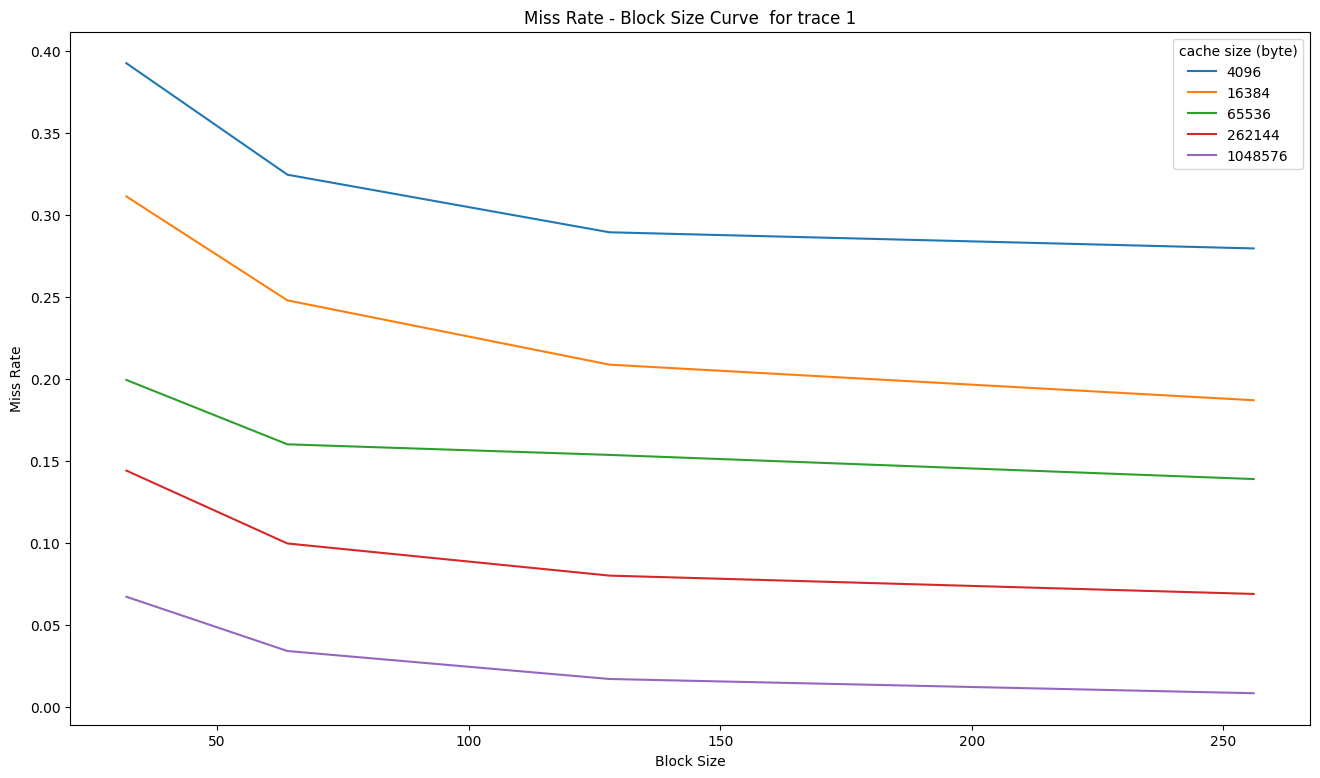

In [49]:
# plot curve

def plot_curve(curve_name : str, xlabel : str, ylabel : str, data : list, label_list : np.ndarray):
    '''
    data should be list[list[np.ndarray]]
    '''
    plt.figure(figsize=(16, 9))
    plt.title(curve_name)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    for i in range(len(data)):
        plt.plot(data[i][0], data[i][1], label = label_list[i])

    plt.legend(title = "cache size (byte)")
    plt.show()

plot_curve("Miss Rate - Block Size Curve  for trace 1", "Block Size", "Miss Rate", trace_1_list, cache_size_list)

## 2.2 Associativity with Miss Rate under different cache size

In [50]:
trace_1_list = get_trace_curve(cache_size_list, trace1, "associativity")

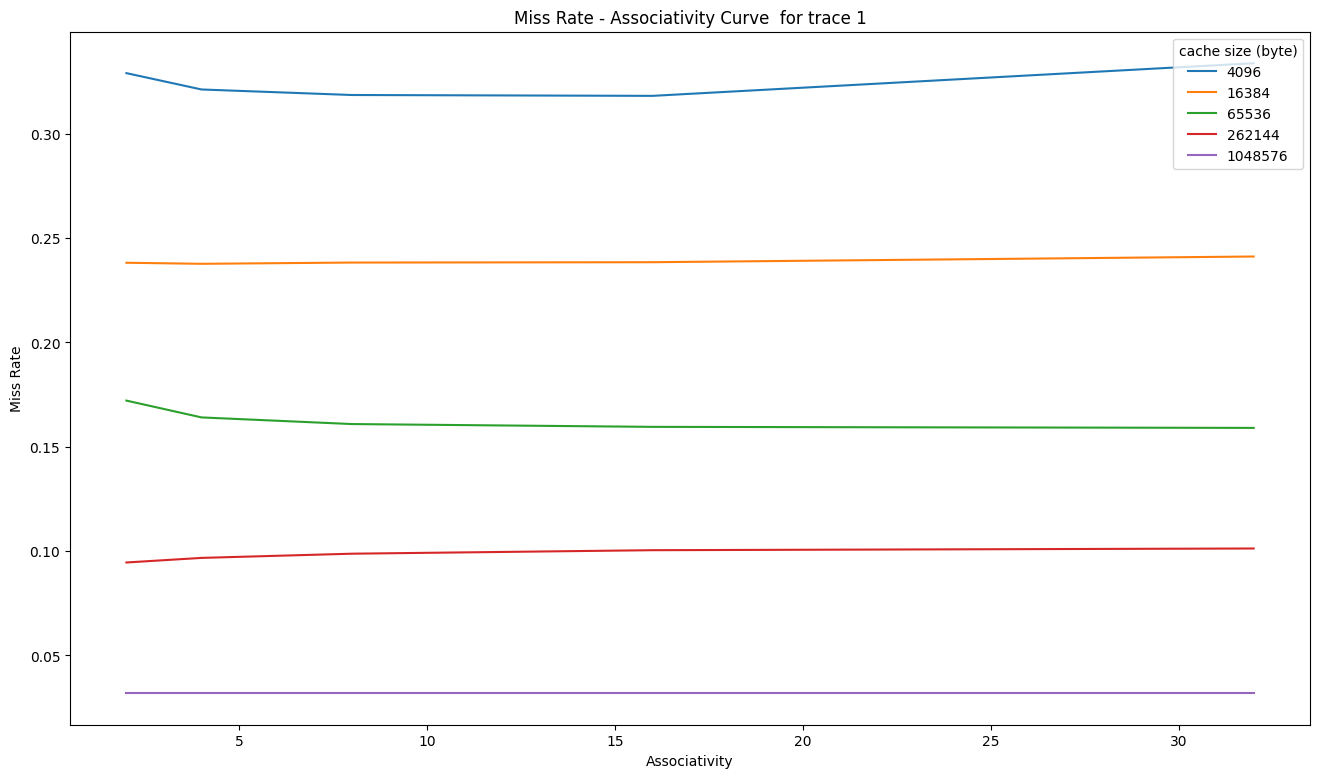

In [51]:
plot_curve("Miss Rate - Associativity Curve  for trace 1", "Associativity", "Miss Rate", trace_1_list, cache_size_list)

## 2.3. amount of cache misses per thousand instructions under different cache sizes

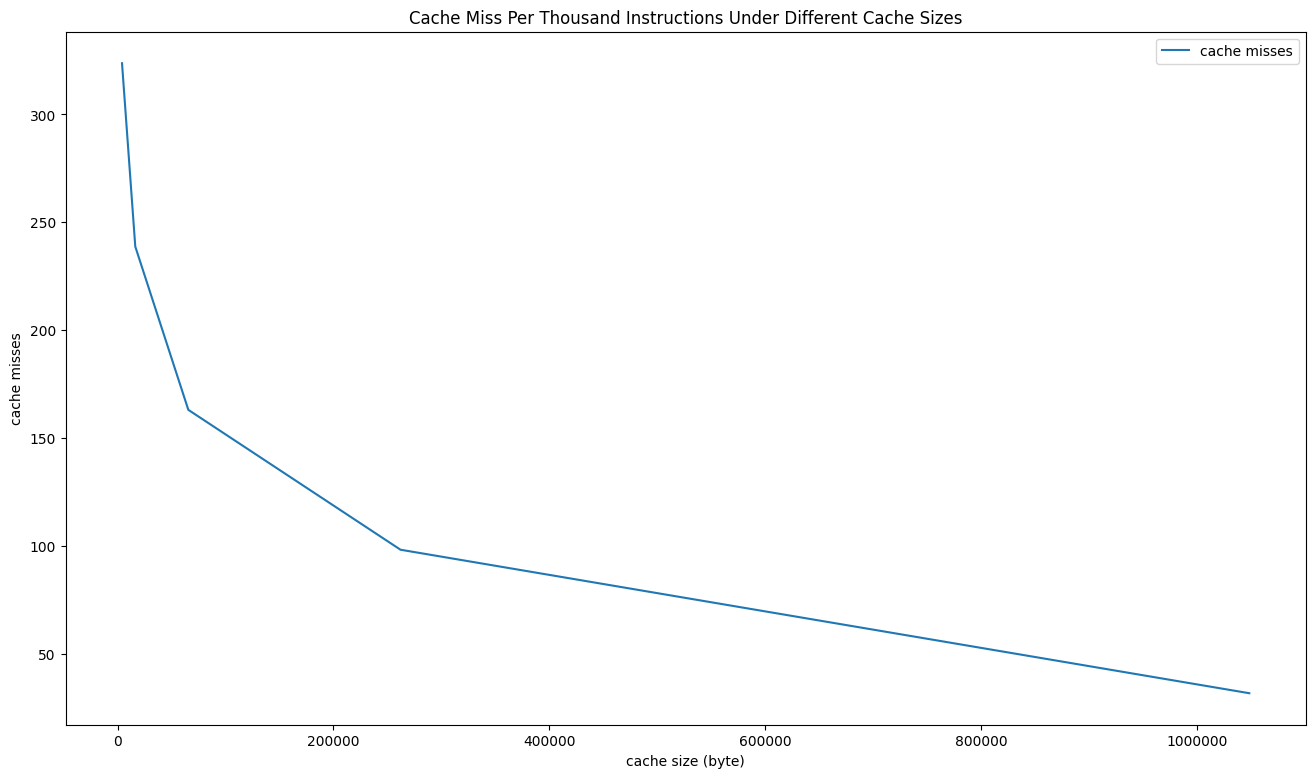

In [52]:
ydata = trace1.groupby("cacheSize").aggregate("mean").loc[:,"missRate"].to_numpy() * 1000
xdata = cache_size_list
plt.figure(figsize=(16,9))
plt.title("Cache Miss Per Thousand Instructions Under Different Cache Sizes")
plt.xlabel("cache size (byte)")
plt.ylabel("cache misses")
plt.ticklabel_format(style='plain', axis='x')
plt.plot(xdata, ydata, label = "cache misses")
plt.legend()
plt.show()